In [454]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from database.TradeHistory import get_session, History
from database.db_utils import get_recent_hist15_df
import datetime
import pandas as pd

In [50]:
session = get_session()
past_time = datetime.datetime.utcnow() - datetime.timedelta(weeks=2)
df = get_recent_hist15_df(past_time, session)
df

,price,size,exec_date
0,1.644362e+06,105.424885,2018-01-02 00:00:00
1,1.650202e+06,116.748774,2018-01-02 00:15:00
2,1.664315e+06,147.815149,2018-01-02 00:30:00
3,1.671328e+06,186.661342,2018-01-02 00:45:00
4,1.658001e+06,156.157317,2018-01-02 01:00:00
5,1.651098e+06,119.810125,2018-01-02 01:15:00
6,1.645640e+06,144.103706,2018-01-02 01:30:00
7,1.646360e+06,78.203487,2018-01-02 01:45:00
8,1.643430e+06,112.391363,2018-01-02 02:00:00
9,1.637672e+06,85.932911,2018-01-02 02:15:00


In [63]:
session = get_session()
df = pd.read_sql_query('select * from history5min', session.bind)
df.exec_date = pd.to_datetime(df.exec_date)
df = df.set_index('exec_date')
df = df.loc['2018-01':]
df

,price,size
exec_date,,
2018-01-01 00:00:00,1.673234e+06,74.720233
2018-01-01 00:05:00,1.667550e+06,70.508537
2018-01-01 00:10:00,1.668468e+06,29.301913
2018-01-01 00:15:00,1.664347e+06,49.249082
2018-01-01 00:20:00,1.664329e+06,43.173694
2018-01-01 00:25:00,1.669620e+06,46.858182
2018-01-01 00:30:00,1.669630e+06,39.154222
2018-01-01 00:35:00,1.666777e+06,47.227315
2018-01-01 00:40:00,1.662448e+06,43.254103


In [64]:
def zs(p, n, shift=0):
    return (p.shift(shift) - p.rolling(n).mean()) / p.rolling(n).std()


def avg(p, n):
    return p.rolling(n).mean()


def std(p, n):
    return p.rolling(n).std()

In [65]:
df.exec_date = pd.to_datetime(df.exec_date)
df = df.set_index('exec_date')

AttributeError: 'DataFrame' object has no attribute 'exec_date'

In [70]:
bench_price = df.price
bench_size = df['size']
dfb = pd.DataFrame([bench_price, bench_size]).T

p = dfb.price
v = dfb['size']

dfb['pma12'] = zs(p / avg(p, 12) - 1, 96)
dfb['pma96'] = zs(p / avg(p, 96) - 1, 96)
dfb['pma672'] = zs(p / avg(p, 672) - 1, 96)

dfb['ma4_36'] = zs(avg(p, 4) / avg(p, 36) - 1, 96)
dfb['ma12_96'] = zs(avg(p, 12) / avg(p, 96) - 1, 96)
dfb['ac12_12'] = zs((p / avg(p, 12)) / avg(p / avg(p, 12), 12), 96)
dfb['ac96_96'] = zs((p / avg(p, 96)) / avg(p / avg(p, 96), 12), 96)

dfb['vma12'] = zs(v / avg(v, 12) - 1, 96)
dfb['vma96'] = zs(v / avg(v, 96) - 1, 96)
dfb['vma672'] = zs(v / avg(v, 672) - 1, 96)

dfb['vZ12'] = zs(v, 12)
dfb['vZ96'] = zs(v, 96)
dfb['vZ672'] = zs(v, 672)

r_label_list = [
    'r', 'r_1', 'r_2',
]
for r_label in r_label_list:
    dfb[r_label] = 0
dfb['state'] = 0

dfb['pZ12'] = zs(p, 12)
dfb['pZ96'] = zs(p, 96)
dfb['vol12'] = zs(std(p, 12), 96)
dfb['vol96'] = zs(std(p, 96), 96)
dfb['vol672'] = zs(std(p, 672), 96)
dfb['dv12_96'] = zs(std(p, 12) / avg(std(p, 12), 96), 96)
dfb['dv96_672'] = zs(std(p, 96) / avg(std(p, 96), 672), 96)

for i in range(96):
    dfb['pZ96_s%02d' % i] = zs(p, 96, shift=i)
    
for i in range(96):
    dfb['pre_diff%02d' % i] = p.shift(i) / p.shift(i + 1) - 1

dfb['max_diff12'] = p / p.rolling(12).max() - 1
dfb['max_diff96'] = p / p.rolling(96).max() - 1
dfb['max_diff672'] = p / p.rolling(672).max() - 1

dfb['min_diff12'] = p / p.rolling(12).min() - 1
dfb['min_diff96'] = p / p.rolling(96).min() - 1
dfb['min_diff672'] = p / p.rolling(672).min() - 1

dfb['utctime'] = (dfb.index.hour * 4 + dfb.index.minute / 15) / 96

dfz = dfb

indicator = dfz.reset_index().loc[:, 'pma12':'utctime']
price_history = dfz.reset_index().price

indicator['vma12'] = indicator.vma12.fillna(0)
indicator['vZ12'] = indicator.vZ12.fillna(0)

In [71]:
answer = price_history.shift(-1) / price_history - 1
answer = (answer > 0.0005) * 1 - (answer < -0.0005) * 1 + 1

indexer = indicator.dv96_672.notnull()

In [72]:
import numpy as np
d_exp = indicator.loc[indexer]
d_obj = answer[indexer]
data = np.array(d_exp, dtype=np.float32)
t_data = np.array(d_obj, dtype=np.int32)

In [69]:
import chainer
from chainer import cuda, Function, gradient_check, report, training, utils, Variable
from chainer import datasets, iterators, optimizers, serializers
from chainer import Link, Chain, ChainList, cuda
import chainer.functions as F
import chainer.links as L

In [73]:
row, col = d_exp.shape

# ls_1 = 500
# ls_2 = 1000
# ls_3 = 1000
# ls_4 = 200
# out_size = 3
# class MyChain(Chain):
#     def __init__(self):
#         super().__init__(
#             l1=L.Linear(col, ls_1),
#             l2=L.Linear(ls_1, ls_2),
#             l3=L.Linear(ls_2, ls_3),
#             l4=L.Linear(ls_3, ls_4),
#             l5=L.Linear(ls_4, out_size)
#         )
    
#     def __call__(self, x):
#         h1 = F.sigmoid(self.l1(x))
#         h2 = F.sigmoid(self.l2(h1))
#         h3 = F.sigmoid(self.l3(h2))
#         h4 = F.sigmoid(self.l4(h3))
#         o = self.l5(h4)
#         return o

ls_1 = 600
ls_2 = 1200
ls_3 = 1200
ls_4 = 400
out_size = 3
class MyChain(Chain):
    def __init__(self):
        super().__init__(
            l1=L.Linear(col, ls_1),
            l2=L.Linear(ls_1, ls_2),
            l3=L.Linear(ls_2, ls_3),
            l4=L.Linear(ls_3, ls_4),
            l5=L.Linear(ls_4, out_size)
        )
    
    def __call__(self, x):
#         if chainer.config.train:
#             h = F.sigmoid(self.l1(x))
#             h = F.dropout(F.sigmoid(self.l2(h)), ratio=0.05)
# #             h = F.dropout(F.sigmoid(self.l3(h)), ratio=0.1)
#             h = F.dropout(F.leaky_relu(self.l4(h)), ratio=0.1)
#             h = F.sigmoid(self.l5(h))
#             print('train')
#         else:
        h = F.sigmoid(self.l1(x))
        h = F.sigmoid(self.l2(h))
        h = F.leaky_relu(self.l3(h))
        h = F.sigmoid(self.l4(h))
        o = self.l5(h)
        return o

In [75]:
model = MyChain()
serializers.load_npz('agent/6_12_12_4.npz', model)

In [76]:
res = model(data).data
res

array([[ 0.14440711, -0.44734681,  0.15258601],
       [ 0.16584073, -0.473153  ,  0.15645176],
       [-0.04835407, -0.79356998,  0.81291842],
       ..., 
       [ 0.09621637, -0.56733173,  0.42110518],
       [ 0.3034128 , -0.61864048,  0.2494339 ],
       [ 0.34609908, -0.62548262,  0.17039527]], dtype=float32)

In [77]:
result = d_obj.reset_index()
result['predict'] = res.argmax(axis=1)
result

,index,price,predict
0,861,1,2
1,862,2,0
2,863,2,2
3,864,2,2
4,865,2,2
5,866,2,2
6,867,0,2
7,868,0,0
8,869,0,2
9,870,2,2


In [78]:
test = result.loc[:]
test[test.price == test.predict].shape

(1552, 3)

In [79]:
result.groupby(['price', 'predict']).size()

price  predict
0      0          668
       1           53
       2          593
1      0          337
       1           63
       2          409
2      0          490
       1           42
       2          821
dtype: int64

In [80]:
price_test = price_history[indexer]

In [81]:
price_test

861     1.747881e+06
862     1.747658e+06
863     1.755827e+06
864     1.761749e+06
865     1.764762e+06
866     1.766262e+06
867     1.767649e+06
868     1.766692e+06
869     1.764914e+06
870     1.759369e+06
871     1.760515e+06
872     1.765785e+06
873     1.771252e+06
874     1.781771e+06
875     1.788663e+06
876     1.792452e+06
877     1.784612e+06
878     1.779257e+06
879     1.782721e+06
880     1.788304e+06
881     1.786417e+06
882     1.793594e+06
883     1.799675e+06
884     1.798320e+06
885     1.805903e+06
886     1.812891e+06
887     1.812567e+06
888     1.809108e+06
889     1.810212e+06
890     1.807172e+06
            ...     
4307    1.691696e+06
4308    1.692797e+06
4309    1.687896e+06
4310    1.687282e+06
4311    1.684279e+06
4312    1.677770e+06
4313    1.677575e+06
4314    1.681322e+06
4315    1.678920e+06
4316    1.673304e+06
4317    1.673369e+06
4318    1.672970e+06
4319    1.674706e+06
4320    1.676290e+06
4321    1.671691e+06
4322    1.667855e+06
4323    1.663

In [82]:
from matplotlib import pyplot as plt
%matplotlib inline

jpy = 40000
btc = 0
com = 0#0.15 / 100
x = []
y_p = []
y_jpy = []
sz_all = price_test.size
begin = 0
for i, (prc, pred) in enumerate(zip(price_test[begin:], result.predict[begin:])):
    if pred == 2 and jpy > 0:
        btc += jpy / (prc * (1 + com))
        jpy = 0
    elif pred == 0 and btc > 0:
        jpy += btc * (prc * (1 - com))
        btc = 0
    x.append(i)
    y_p.append(prc)
    y_jpy.append(jpy + btc * prc)
jpy + btc * prc

70286.230175393663

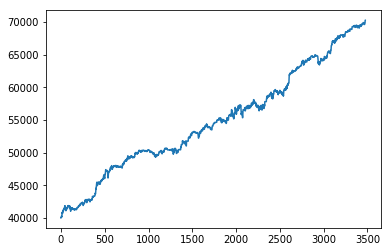

In [83]:
plt.plot(x, y_jpy)

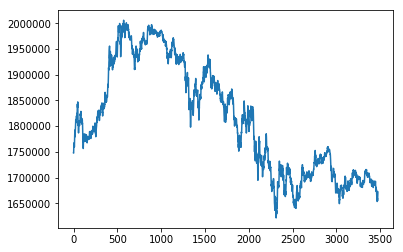

In [84]:
plt.plot(x, y_p)

In [67]:
exp_single = [indicator.loc[1000]]
data_single = np.array(exp_single, dtype=np.float32)
data_single

array([[-0.10468615, -0.24378949,  1.17827272,  0.31623939, -0.18529482,
        -0.30773506, -0.22841381, -0.77849382, -0.74054968, -0.65952748,
        -1.2418139 , -0.67521131, -0.88793594,  0.        ,  0.        ,
         0.        ,  0.        ,  0.68722892,  1.45043373, -0.45318955,
         0.09282427,  1.86361432, -0.63901508,  0.07308167,  0.70833331]], dtype=float32)

In [47]:
test.price.shift(0)

1060    2
1061    0
1062    1
1063    0
1064    0
1065    0
1066    0
1067    0
1068    0
1069    0
1070    0
1071    0
1072    0
1073    2
1074    2
1075    0
1076    0
1077    0
1078    1
1079    0
1080    2
1081    2
1082    2
1083    2
1084    2
1085    2
1086    0
1087    0
1088    2
1089    2
       ..
1126    0
1127    0
1128    0
1129    0
1130    0
1131    0
1132    1
1133    0
1134    0
1135    2
1136    2
1137    0
1138    0
1139    0
1140    0
1141    2
1142    2
1143    0
1144    0
1145    2
1146    2
1147    2
1148    2
1149    2
1150    0
1151    0
1152    0
1153    2
1154    0
1155    1
Name: price, Length: 96, dtype: int32